<a href="https://colab.research.google.com/github/ViniciusCastillo/Aprendendo/blob/master/BootcampAlura_Modulo2_Aula6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise dos valores de procedimetnos do Data SUS 

In [19]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
from datetime import date
# configurando formato de apresentação de números
pd.options.display.float_format = "{:,.2f}".format


In [20]:
# preparando a base: lendo arquivo, incluindo região e ajustando nome dos estados
# importando os números
dados = pd.read_csv("https://raw.githubusercontent.com/ViniciusCastillo/Aprendendo/master/A165345189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",")
# criando o campo do códgio da região
dados["Cod_Região"]=dados["Unidade da Federação"].str[0]
# inclui os nomes das regiões
Base_regioes = pd.DataFrame({"Cod":["1","2","3","4","5"],"Região":["Norte","Nordeste","Sudeste","Sul","Centro-Oeste"]}, columns=["Cod","Região"])
Base_regioes = Base_regioes.set_index("Cod")
# inclui os nomes das regiões em dados
dados = dados.join(Base_regioes, on="Cod_Região")
# retirando os números de antes do nome dos estados
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.replace("\d+", "")
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.strip()
#verificando a marcação de Região
dados[["Região","Unidade da Federação","Total"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,Região,Unidade da Federação,Total
0,Norte,Rondônia,"1,073,782,138.81"
1,Norte,Acre,"475,290,315.34"
2,Norte,Amazonas,"2,041,003,727.86"
3,Norte,Roraima,"349,395,453.66"
4,Norte,Pará,"4,950,135,530.02"
5,Norte,Amapá,"326,885,943.09"
6,Norte,Tocantins,"1,109,478,655.20"
7,Nordeste,Maranhão,"4,120,818,450.35"
8,Nordeste,Piauí,"2,426,540,822.88"
9,Nordeste,Ceará,"7,018,565,512.36"


In [21]:
#selecionando as colunas
# selecionando apenas colunas com valores para todas as linhas
col_usaveis = dados.mean().index.tolist()
# adicionando coluna não numérica com os titulos das linhas
col_usaveis.insert(0, "Unidade da Federação")
# excluindo a coluna TOTAL e Cod_Região
del col_usaveis[-2:]
# excluindo colunas iniciais com valores distorcidos
del col_usaveis[1:7]
# confirmando se realmente foram excluidas
# col_usaveis[-5:]
col_usaveis[:5]

['Unidade da Federação', '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai']

In [22]:
# criando a série do último mês disponível e ordena por valor
base_usavel = dados[col_usaveis] # pega apenas as colunas completas
base_usavel = base_usavel.set_index("Unidade da Federação") # define o index dessa nova base
ultimoMes = base_usavel.iloc[:,-1:] # cria a série pegando apenas o último mês
ultimoMes = ultimoMes.sort_values(by=ultimoMes.columns[0], ascending=False) # ordena pelo valor do mês
# validações
# ultimoMes.tail()
ultimoMes.head()

,2021/Jul
Unidade da Federação,
São Paulo,"305,314,678.98"
Minas Gerais,"154,160,802.91"
Paraná,"102,067,382.02"
Rio Grande do Sul,"88,897,808.64"
Rio de Janeiro,"86,682,141.36"


In [23]:
meses = {"Jan":1,"Fev":2,"Mar":3,"Abr":4,"Mai":5,"Jun":6,"Jul":7,"Ago":8,"Set":9,"Out":10,"Nov":11,"Dez":12}
from datetime import date
def converte_data(anomes):
  ano = int(anomes[:4])
  mes = meses[anomes[5:]]
  return date(ano,mes,1)

In [24]:
base_ajustada = base_usavel
base_ajustada.columns = base_ajustada.columns.map(converte_data)
base_ajustada = base_ajustada.reset_index().melt(id_vars="Unidade da Federação", value_vars=base_ajustada.columns)
base_ajustada.columns = ["uf", "anoMes", "gasto"]
base_ajustada["anoMes"] = base_ajustada["anoMes"].astype("datetime64")
base_ajustada.head()

,uf,anoMes,gasto
0,Rondônia,2008-02-01,"1,940,792.63"
1,Acre,2008-02-01,"1,743,978.66"
2,Amazonas,2008-02-01,"7,934,652.10"
3,Roraima,2008-02-01,"771,687.83"
4,Pará,2008-02-01,"20,126,081.01"


In [25]:
meses_BR = {1:"Jan", 2:"Fev", 3:"Mar", 4:"Abr", 5:"Mai", 6:"Jun", 7:"Jul", 8:"Ago", 9:"Set", 10:"Out", 11:"Nov", 12:"Dez"}
base_ajustada["ano"] = base_ajustada["anoMes"].dt.year
base_ajustada["mes"] = base_ajustada["anoMes"].dt.month
base_ajustada["mesIngles"] = base_ajustada["anoMes"].dt.month_name().str[:3]
base_ajustada["mesBR"] = base_ajustada["mes"].map(meses_BR)
base_ajustada["gastoDiario"] = base_ajustada["gasto"] / base_ajustada["anoMes"].dt.days_in_month
base_ajustada.head()

,uf,anoMes,gasto,ano,mes,mesIngles,mesBR,gastoDiario
0,Rondônia,2008-02-01,"1,940,792.63",2008,2,Feb,Fev,"66,923.88"
1,Acre,2008-02-01,"1,743,978.66",2008,2,Feb,Fev,"60,137.20"
2,Amazonas,2008-02-01,"7,934,652.10",2008,2,Feb,Fev,"273,608.69"
3,Roraima,2008-02-01,"771,687.83",2008,2,Feb,Fev,"26,609.93"
4,Pará,2008-02-01,"20,126,081.01",2008,2,Feb,Fev,"694,002.79"


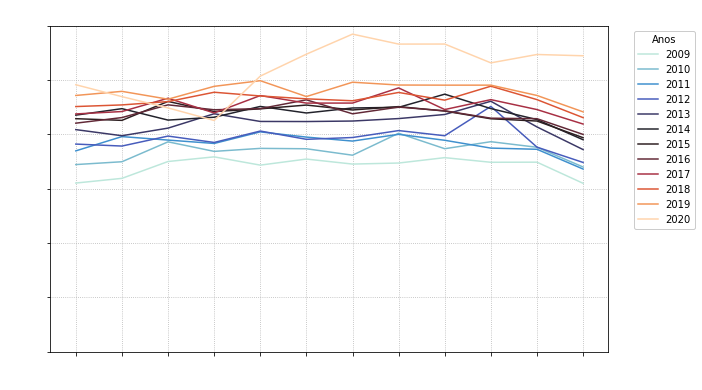

In [26]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=base_ajustada.query("uf=='São Paulo' and ano > 2008 and ano < 2021"), x="mesBR", y="gastoDiario", 
                  hue="ano", palette=sns.color_palette("icefire", as_cmap=True), legend="full")
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
ax.legend(loc='upper center', shadow=False, bbox_to_anchor=(1.1, 1), title="Anos", framealpha=1)
plt.ylim(0, 12*escalaY)
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.yticks(color="white")
plt.xlabel("Mês", fontweight="bold", color="white")
plt.xticks(color="white")
plt.grid(linestyle=":")
plt.title("Gastos médios dirários dos procedimentos do SUS em São Paulo", fontweight="bold", color="white", fontsize=15)
plt.show()

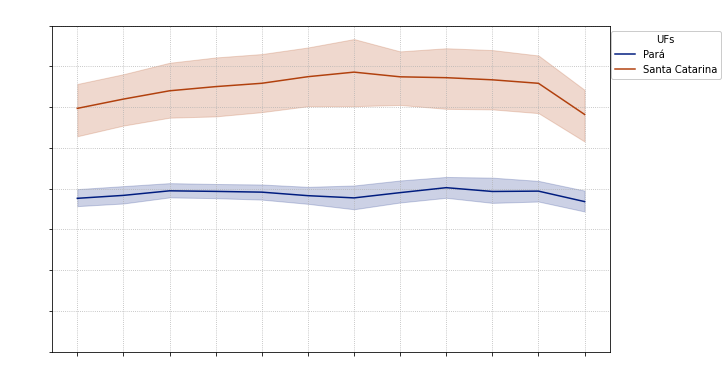

In [27]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=base_ajustada.query("uf in ('Pará','Santa Catarina') and ano > 2008 and ano < 2020"), x="mesBR", y="gastoDiario", 
                  hue="uf", palette="dark", legend='full')
escalaY = 1e6
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
ax.legend(loc='upper center', shadow=False, bbox_to_anchor=(1.1, 1), title="UFs", framealpha=1)
plt.ylim(0, 2*escalaY)
plt.ylabel("Valor - R$ MM", fontweight="bold", color="white")
plt.yticks(color="white")
plt.xlabel("Mês", fontweight="bold", color="white")
plt.xticks(color="white")
plt.grid(linestyle=":")
plt.title("Gastos médios dirários dos procedimentos do SUS - média de 2009 até 2020", fontweight="bold", color="white", fontsize=15)
plt.show()

In [38]:
base_ano_estado = base_ajustada.groupby(["ano","uf"]).sum().reset_index()
base_ano_estado.head()

,ano,uf,gasto,mes,gastoDiario
0,2008,Acre,"22,748,790.03",77,"746,719.61"
1,2008,Alagoas,"104,221,556.72",77,"3,422,592.78"
2,2008,Amapá,"16,082,297.60",77,"528,088.52"
3,2008,Amazonas,"91,277,492.92",77,"2,997,665.29"
4,2008,Bahia,"469,046,220.27",77,"15,383,920.66"


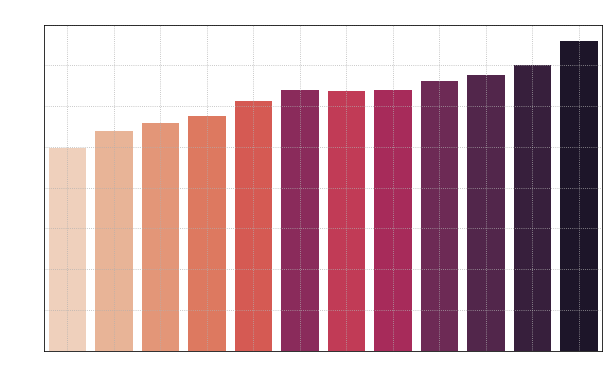

In [96]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=base_ano_estado.query("uf in 'São Paulo' and ano >2008 and ano <2021"), x="ano", 
            y="gasto", palette=sns.color_palette("rocket_r", 12), hue="gasto", dodge=False)
ax.legend_.remove()
escalaY = 1e9
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.1f}'.format(x/escalaY)))
plt.ylim(0, 4*escalaY)
plt.ylabel("Valor - R$ Bi", fontweight="bold", color="white")
plt.yticks(color="white")
plt.xlabel("Ano", fontweight="bold", color="white")
plt.xticks(color="white")
plt.grid(linestyle=":")
plt.title("Evolução de gastos dos procedimentos do SUS em São Paulo", fontweight="bold", color="white", fontsize=15)
plt.show()

In [94]:
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['text.color'] = 'white'

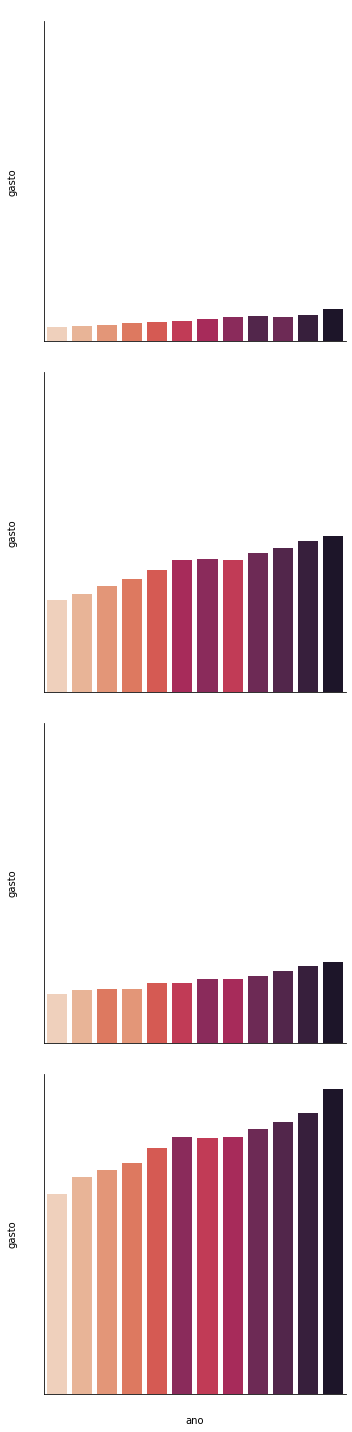

In [95]:
ax = sns.catplot(data=base_ano_estado.query("uf in ('São Paulo','Rio de Janeiro','Minas Gerais','Espírito Santo') and ano >2008 and ano <2021"), 
                 x="ano", y="gasto", row="uf", kind="bar", palette=sns.color_palette("rocket_r", 12), hue="gasto",dodge=False, legend=False)
plt.show()